# <center> Визуализация на реальных данных
## <center>Часть 1. Matplotlib


В начале как всегда настроим окружение: импортируем все необходимые библиотеки и настроим дефолтное отображение картинок.

In [13]:
# для установки библиотек
# ! pip3 install seaborn
# ! pip3 install plotly
# ! pip3 install matplotlib

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' # ’retina’ - для еще более четкого отображения

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Для примеров визуализаций будем рассматриваь данные о продажах и оценках видео-игр. Данные об оценках игр есть не для всех строк, поэтому для упрощения оставим только те записи, по которым есть полные данные.

In [2]:
df = pd.read_csv('video_games_sales.csv')
print(df.shape)

(16719, 16)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [6]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей, чтобы убедиться, что все распарсилось правильно. Для удобства оставили только те признаки, которые будем в дальнейшем использовать.

In [7]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head(10)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.32,87.0,80,8.4,594,E
11,Mario Kart DS,DS,2005,Racing,23.21,91.0,64,8.6,464,E
13,Wii Fit,Wii,2007,Sports,22.70,80.0,63,7.7,146,E
14,Kinect Adventures!,X360,2010,Misc,21.81,61.0,45,6.3,106,E
15,Wii Fit Plus,Wii,2009,Sports,21.79,80.0,33,7.4,52,E


Начнем с самого простого и зачастую удобного способа визуализировать данные из `pandas dataframe` — это воспользоваться функцией `plot.`
Для примера построим **график продаж видео игр в различных странах в зависимости от года**. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам и у получившегося `dataframe` вызовем функцию `plot` без параметров. 

В библиотеку `pandas` встроен wrapper для `matplotlib`.

In [8]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [10]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]\
    .groupby('Year_of_Release').sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10


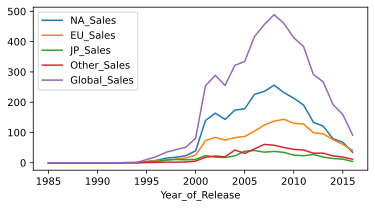

In [11]:
df1.plot();

В этом случае мы сконцентрировались на отображении трендов продаж в разных регионах.

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметра rot отвечает за угол наклона подписей к оси x.

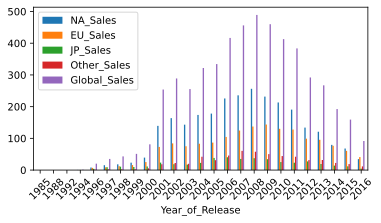

In [12]:
df1.plot(kind='bar', rot=45);

Или можем сделать stacked bar chart, чтобы показать и динамику продаж и их разбиение по рынкам.

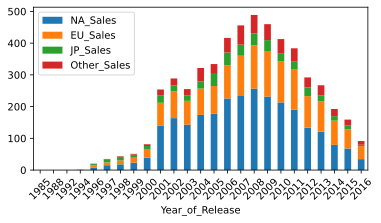

In [13]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='bar', rot=45, stacked=True);

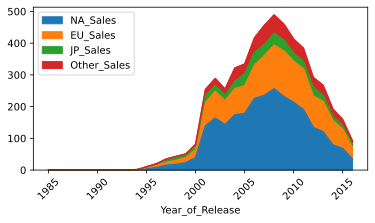

In [14]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45, stacked=True);

Еще один часто встречающийся тип графиков - это гистограммы. Посмотрим на **распределение оценок критиков**.

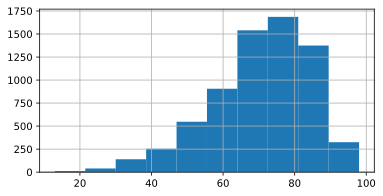

In [15]:
df.Critic_Score.hist();

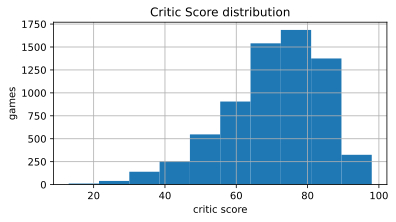

In [16]:
ax = df.Critic_Score.hist()
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games');

У гистограмм можно контролировать, на сколько групп мы разбиваем распределение с помощью параметра `bins`.

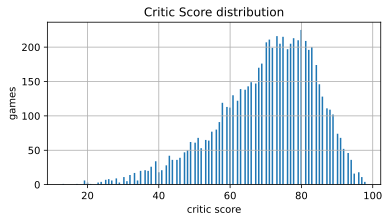

In [20]:
ax = df.Critic_Score.hist(bins = 200)
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games');

#### В pandas можно стилизовать таблицы.

In [21]:
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

,Global_Sales
Developer,
Nintendo,529.90
EA Sports,145.93
EA Canada,131.46
Rockstar North,119.47
Capcom,114.52
Treyarch,101.37
Ubisoft Montreal,101.24
Ubisoft,94.53
EA Tiburon,79.77


In [22]:
top_developers_df.style.bar()

,Global_Sales
Developer,
Nintendo,529.900000
EA Sports,145.930000
EA Canada,131.460000
Rockstar North,119.470000
Capcom,114.520000
Treyarch,101.370000
Ubisoft Montreal,101.240000
Ubisoft,94.530000
EA Tiburon,79.770000


In [24]:
# функция подсветки максимальных значений в таблицу
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [25]:
# поиск и подсветка максимальных значений в таблице
df[useful_cols].head(10).style.apply(highlight_max, subset=['Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count'])

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.530000,76.000000,51,8.000000,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.520000,82.000000,73,8.300000,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.770000,80.000000,73,8.000000,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.800000,89.000000,65,8.500000,431,E
7,Wii Play,Wii,2006,Misc,28.920000,58.000000,41,6.600000,129,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.320000,87.000000,80,8.400000,594,E
11,Mario Kart DS,DS,2005,Racing,23.210000,91.000000,64,8.600000,464,E
13,Wii Fit,Wii,2007,Sports,22.700000,80.000000,63,7.700000,146,E
14,Kinect Adventures!,X360,2010,Misc,21.810000,61.000000,45,6.300000,106,E
15,Wii Fit Plus,Wii,2009,Sports,21.790000,80.000000,33,7.400000,52,E


### Полезные ссылки
 * [Документация pandas.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
 * [Документация pandas.style](http://pandas.pydata.org/pandas-docs/stable/style.html)
 * [Документация matplotlib](https://matplotlib.org/)

## <center>Часть 2. Seaborn

Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков **pair plot (scatter plot matrix)**. Эта визуализация поможет посмотреть на одной картинке, как связаны между собой различные признаки. 

In [2]:
import seaborn as sns

In [3]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'svg' 
sns_plot = sns.pairplot(
    df[['Global_Sales', 'Critic_Score', 'User_Score']]);
#sns_plot.savefig('pairplot.png') # сохраненеи графика в файл картинки

NameError: name 'df' is not defined

Также с помощью `seaborn` можно построить распределение, для примера посмотрим на **распределение оценок критиков `Critic_Score`**. Для этого построим __`distplot`__. По default'у на графике отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

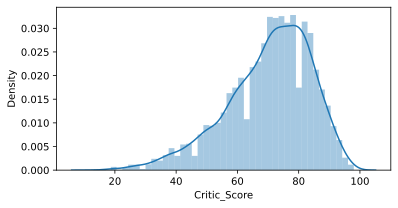

In [30]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.Critic_Score);

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и __`joint_plot`__ – это гибрид `scatter plot` и `histogram` (отображаются также гистограммы распределений признаков). Посмотрим на то, как связаны между собой **оценка критиков `Critic_Score` и оценка пользователя `User_Score`**.

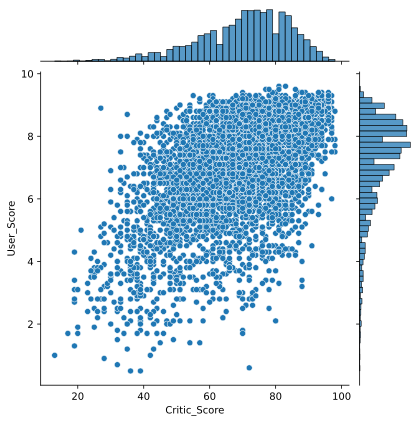

In [31]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

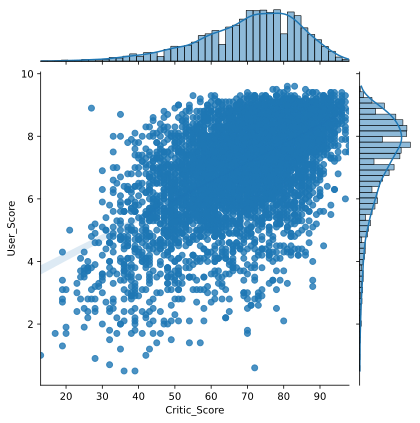

In [32]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='reg');

Еще один полезный тип графиков - это __`box plot`__. Давайте **сравним пользовательские оценки игр для топ-5 крупнейших игровых платформ**.

In [33]:
df.Platform.value_counts().head(5).index.values

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

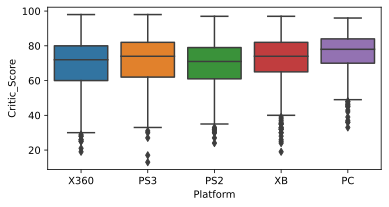

In [34]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)]);

Как понимать `box plot`. `Box plot` состоит из коробки (поэтому он и называется `box plot`), усиков и точек. Коробка показывает интерквантильный размах распределения, то есть соответственно 25% (`Q1`) и 75% (`Q3`) процентили. Черта внутри коробки обозначает медиану распределения. 
Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`, где `IQR = Q3 - Q1` - интерквантильный размах. Точками на графике обозначаются выбросы (`outliers`) - те значения, которые не вписываются в промежуток значений, заданный усами графика.


И еще один тип графиков - это __`heat map`__. `Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные продажи игр по жанрам и игровым платформам**.

In [35]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


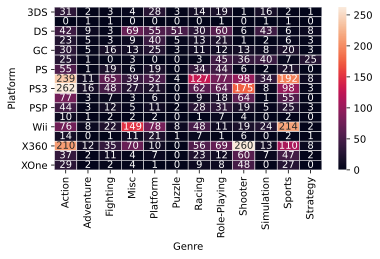

In [36]:
sns.heatmap(platform_genre_sales, annot=True, fmt=".0f", 
            linewidths=0.5);

### Полезные ссылки
* [Tutirial](https://seaborn.pydata.org/tutorial.html)
* [Gellery](https://seaborn.pydata.org/examples/index.html)